In [ ]:
%pip install pyautogen

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

import autogen

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST.json",
)

In [16]:
llm_config = {"config_list": config_list_gpt4}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },  # Please set use_docker=True if docker is available to run the generated code. Using docker is safer than running the generated code directly.
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
    system_message="You are Python expert assistant doing well with generating code and modifying errors.",
)



critic = autogen.AssistantAgent(
    name="Critic",
     system_message="""Critic. 귀하는 명확한 근거를 제시하면서 1(나쁨)~10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도로 숙련된 도우미입니다. 각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 평가할 수 있습니다.
- 버그(버그): 버그, 논리 오류, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유가 있나요? 어떻게 수정해야 하나요? 버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
- 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요? 예를 들어, 데이터 집합이 필요한 경우 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
- 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
- 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가? 인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
- 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
- 미학(심미성): 비주얼리제이션의 미학이 비주얼리제이션 유형 및 데이터에 적합한가?
위의 각 차원에 대한 점수를 제공해야 합니다.
{버그: 0, 변환: 0, 목표준수: 0, 유형: 0, 인코딩: 0, 미학: 0}
코드를 제안하지 마세요.
마지막으로, 위의 비판을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
""",
#     system_message="""Critic. You are a helpful assistant highly skilled in evaluating the quality of a given visualization code by providing a score from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER VISUALIZATION BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
# - bugs (bugs):  are there bugs, logic errors, syntax error or typos? Are there any reasons why the code may fail to compile? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
# - Data transformation (transformation): Is the data transformed appropriately for the visualization type? E.g., is the dataset appropriated filtered, aggregated, or grouped  if needed? If a date field is used, is the date field first converted to a date object etc?
# - Goal compliance (compliance): how well the code meets the specified visualization goals?
# - Visualization type (type): CONSIDERING BEST PRACTICES, is the visualization type appropriate for the data and intent? Is there a visualization type that would be more effective in conveying insights? If a different visualization type is more appropriate, the score MUST BE LESS THAN 5.
# - Data encoding (encoding): Is the data encoded appropriately for the visualization type?
# - aesthetics (aesthetics): Are the aesthetics of the visualization appropriate for the visualization type and the data?

# YOU MUST PROVIDE A SCORE for each of the above dimensions.
# {bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
# Do not suggest code.
# Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
# """,
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [17]:
user_proxy.initiate_chat(
    manager,
    # message="download data from https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv and plot a visualization that tells us about the relationship between weight and horsepower. Save the plot to a file. Print the fields in a dataset before visualizing it.",
    message="https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv 에서 데이터를 다운로드하고 무게와 마력 사이의 관계를 알려주는 시각화를 플롯합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다.",
)
# type exit to terminate the chat

User_proxy (to chat_manager):

https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv 에서 데이터를 다운로드하고 무게와 마력 사이의 관계를 알려주는 시각화를 플롯합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

먼저, `pandas`와 `matplotlib` 라이브러리를 사용하여 데이터를 다운로드하고 시각화할 수 있습니다. 다음 Python 코드를 따라하세요:

1. `requests` 라이브러리로 데이터를 다운로드합니다.
2. `pandas`를 사용하여 데이터를 DataFrame에 로드합니다.
3. 데이터의 필드를 출력합니다.
4. `matplotlib`를 사용하여 무게와 마력 간의 관계를 시각화하고 파일에 저장합니다.

아래는 이 과정을 단계별로 설명한 코드입니다:

```python
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드
url = 'https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv'
response = requests.get(url)
with open('cars.csv', 'wb') as f:
    f.write(response.content)

# 데이터 로드
df = pd.read_csv('cars.csv')

# 필드 출력
print("Columns:")
print(df.columns)

# 무게(weight)와 마력(horsepower) 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scat

ChatResult(chat_id=None, chat_history=[{'content': 'https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv 에서 데이터를 다운로드하고 무게와 마력 사이의 관계를 알려주는 시각화를 플롯합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다.', 'role': 'assistant'}, {'content': '먼저, `pandas`와 `matplotlib` 라이브러리를 사용하여 데이터를 다운로드하고 시각화할 수 있습니다. 다음 Python 코드를 따라하세요:\n\n1. `requests` 라이브러리로 데이터를 다운로드합니다.\n2. `pandas`를 사용하여 데이터를 DataFrame에 로드합니다.\n3. 데이터의 필드를 출력합니다.\n4. `matplotlib`를 사용하여 무게와 마력 간의 관계를 시각화하고 파일에 저장합니다.\n\n아래는 이 과정을 단계별로 설명한 코드입니다:\n\n```python\nimport requests\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# 데이터 다운로드\nurl = \'https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv\'\nresponse = requests.get(url)\nwith open(\'cars.csv\', \'wb\') as f:\n    f.write(response.content)\n\n# 데이터 로드\ndf = pd.read_csv(\'cars.csv\')\n\n# 필드 출력\nprint("Columns:")\nprint(df.columns)\n\n# 무게(weight)와 마력(horsepower) 간의 관계 시각화\nplt.figure(figsize=(10, 6))\nplt.scatter(df[\'weight\'], df[\'horsepower

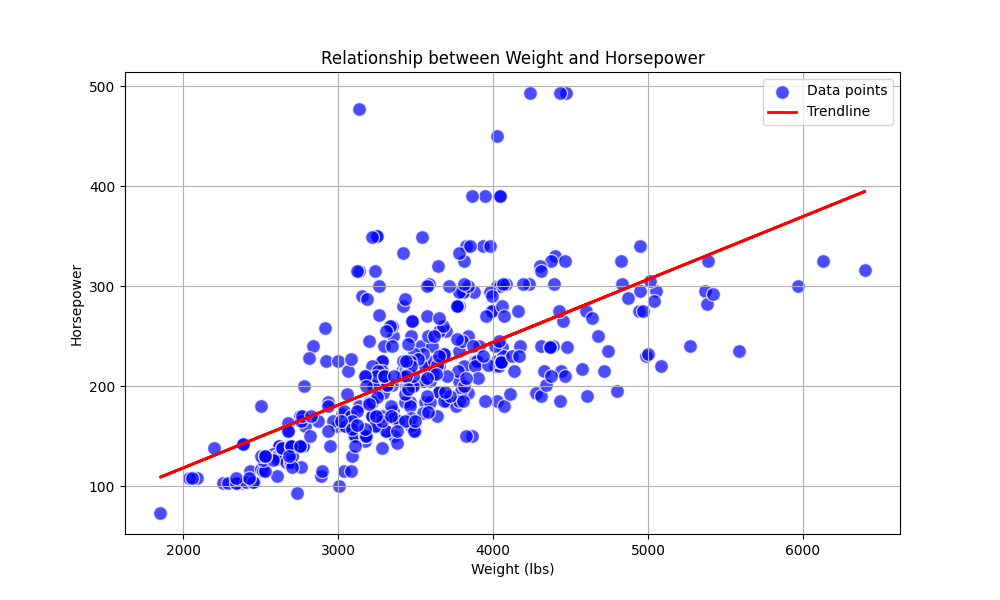

In [18]:
Image(filename="groupchat/weight_vs_horsepower.png")

In [19]:
user_proxy.reset()
coder.reset()
critic.reset()
groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)
user_proxy.initiate_chat(
    manager,
    # message="download data from https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv and show me a plot that tells me about the amount of each weather . Save the plot to a file. Print the fields in a dataset before visualizing it. Take the feedback from the critic to improve the code.",
    message="https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.",
)

User_proxy (to chat_manager):

https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

네, 정말 흥미로운 작업이네요! 아래 Python 코드를 사용해서 데이터셋을 다운로드하고, 필드를 출력한 뒤, 각 날씨의 분포를 시각화하는 플롯을 생성하여 파일에 저장하는 예제를 작성해 보겠습니다.

먼저 필요한 패키지를 설치해야 할 수도 있습니다. `pandas`, `matplotlib`와 `requests`가 필요합니다:

```sh
pip install pandas matplotlib requests
```

이후 코드는 아래와 같이 진행할 수 있습니다:

```python
import pandas as pd
import matplotlib.pyplot as plt
import requests

# 데이터를 다운로드합니다
url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"
response = requests.get(url)
open('seattle-weather.csv', 'wb').write(response.content)

# 데이터 프레임으로 읽어들입니다
df = pd.read_csv('seattle-weather.csv')

# 데이터 프레임의 필드를 출력합니다
print("Data columns:")
print(df.columns)



ChatResult(chat_id=None, chat_history=[{'content': 'https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv 에서 데이터를 다운로드하고 각 날씨의 양을 알려주는 플롯을 표시합니다. 플롯을 파일에 저장합니다. 시각화하기 전에 데이터 집합의 필드를 인쇄합니다. 비평가의 피드백을 받아 코드를 개선합니다.', 'role': 'assistant'}, {'content': '네, 정말 흥미로운 작업이네요! 아래 Python 코드를 사용해서 데이터셋을 다운로드하고, 필드를 출력한 뒤, 각 날씨의 분포를 시각화하는 플롯을 생성하여 파일에 저장하는 예제를 작성해 보겠습니다.\n\n먼저 필요한 패키지를 설치해야 할 수도 있습니다. `pandas`, `matplotlib`와 `requests`가 필요합니다:\n\n```sh\npip install pandas matplotlib requests\n```\n\n이후 코드는 아래와 같이 진행할 수 있습니다:\n\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport requests\n\n# 데이터를 다운로드합니다\nurl = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"\nresponse = requests.get(url)\nopen(\'seattle-weather.csv\', \'wb\').write(response.content)\n\n# 데이터 프레임으로 읽어들입니다\ndf = pd.read_csv(\'seattle-weather.csv\')\n\n# 데이터 프레임의 필드를 출력합니다\nprint("Data columns:")\nprint(df.columns)\n\n# 각 날씨 유형의 빈도를 시각화하는 바 플롯을 생성합니다\nweath

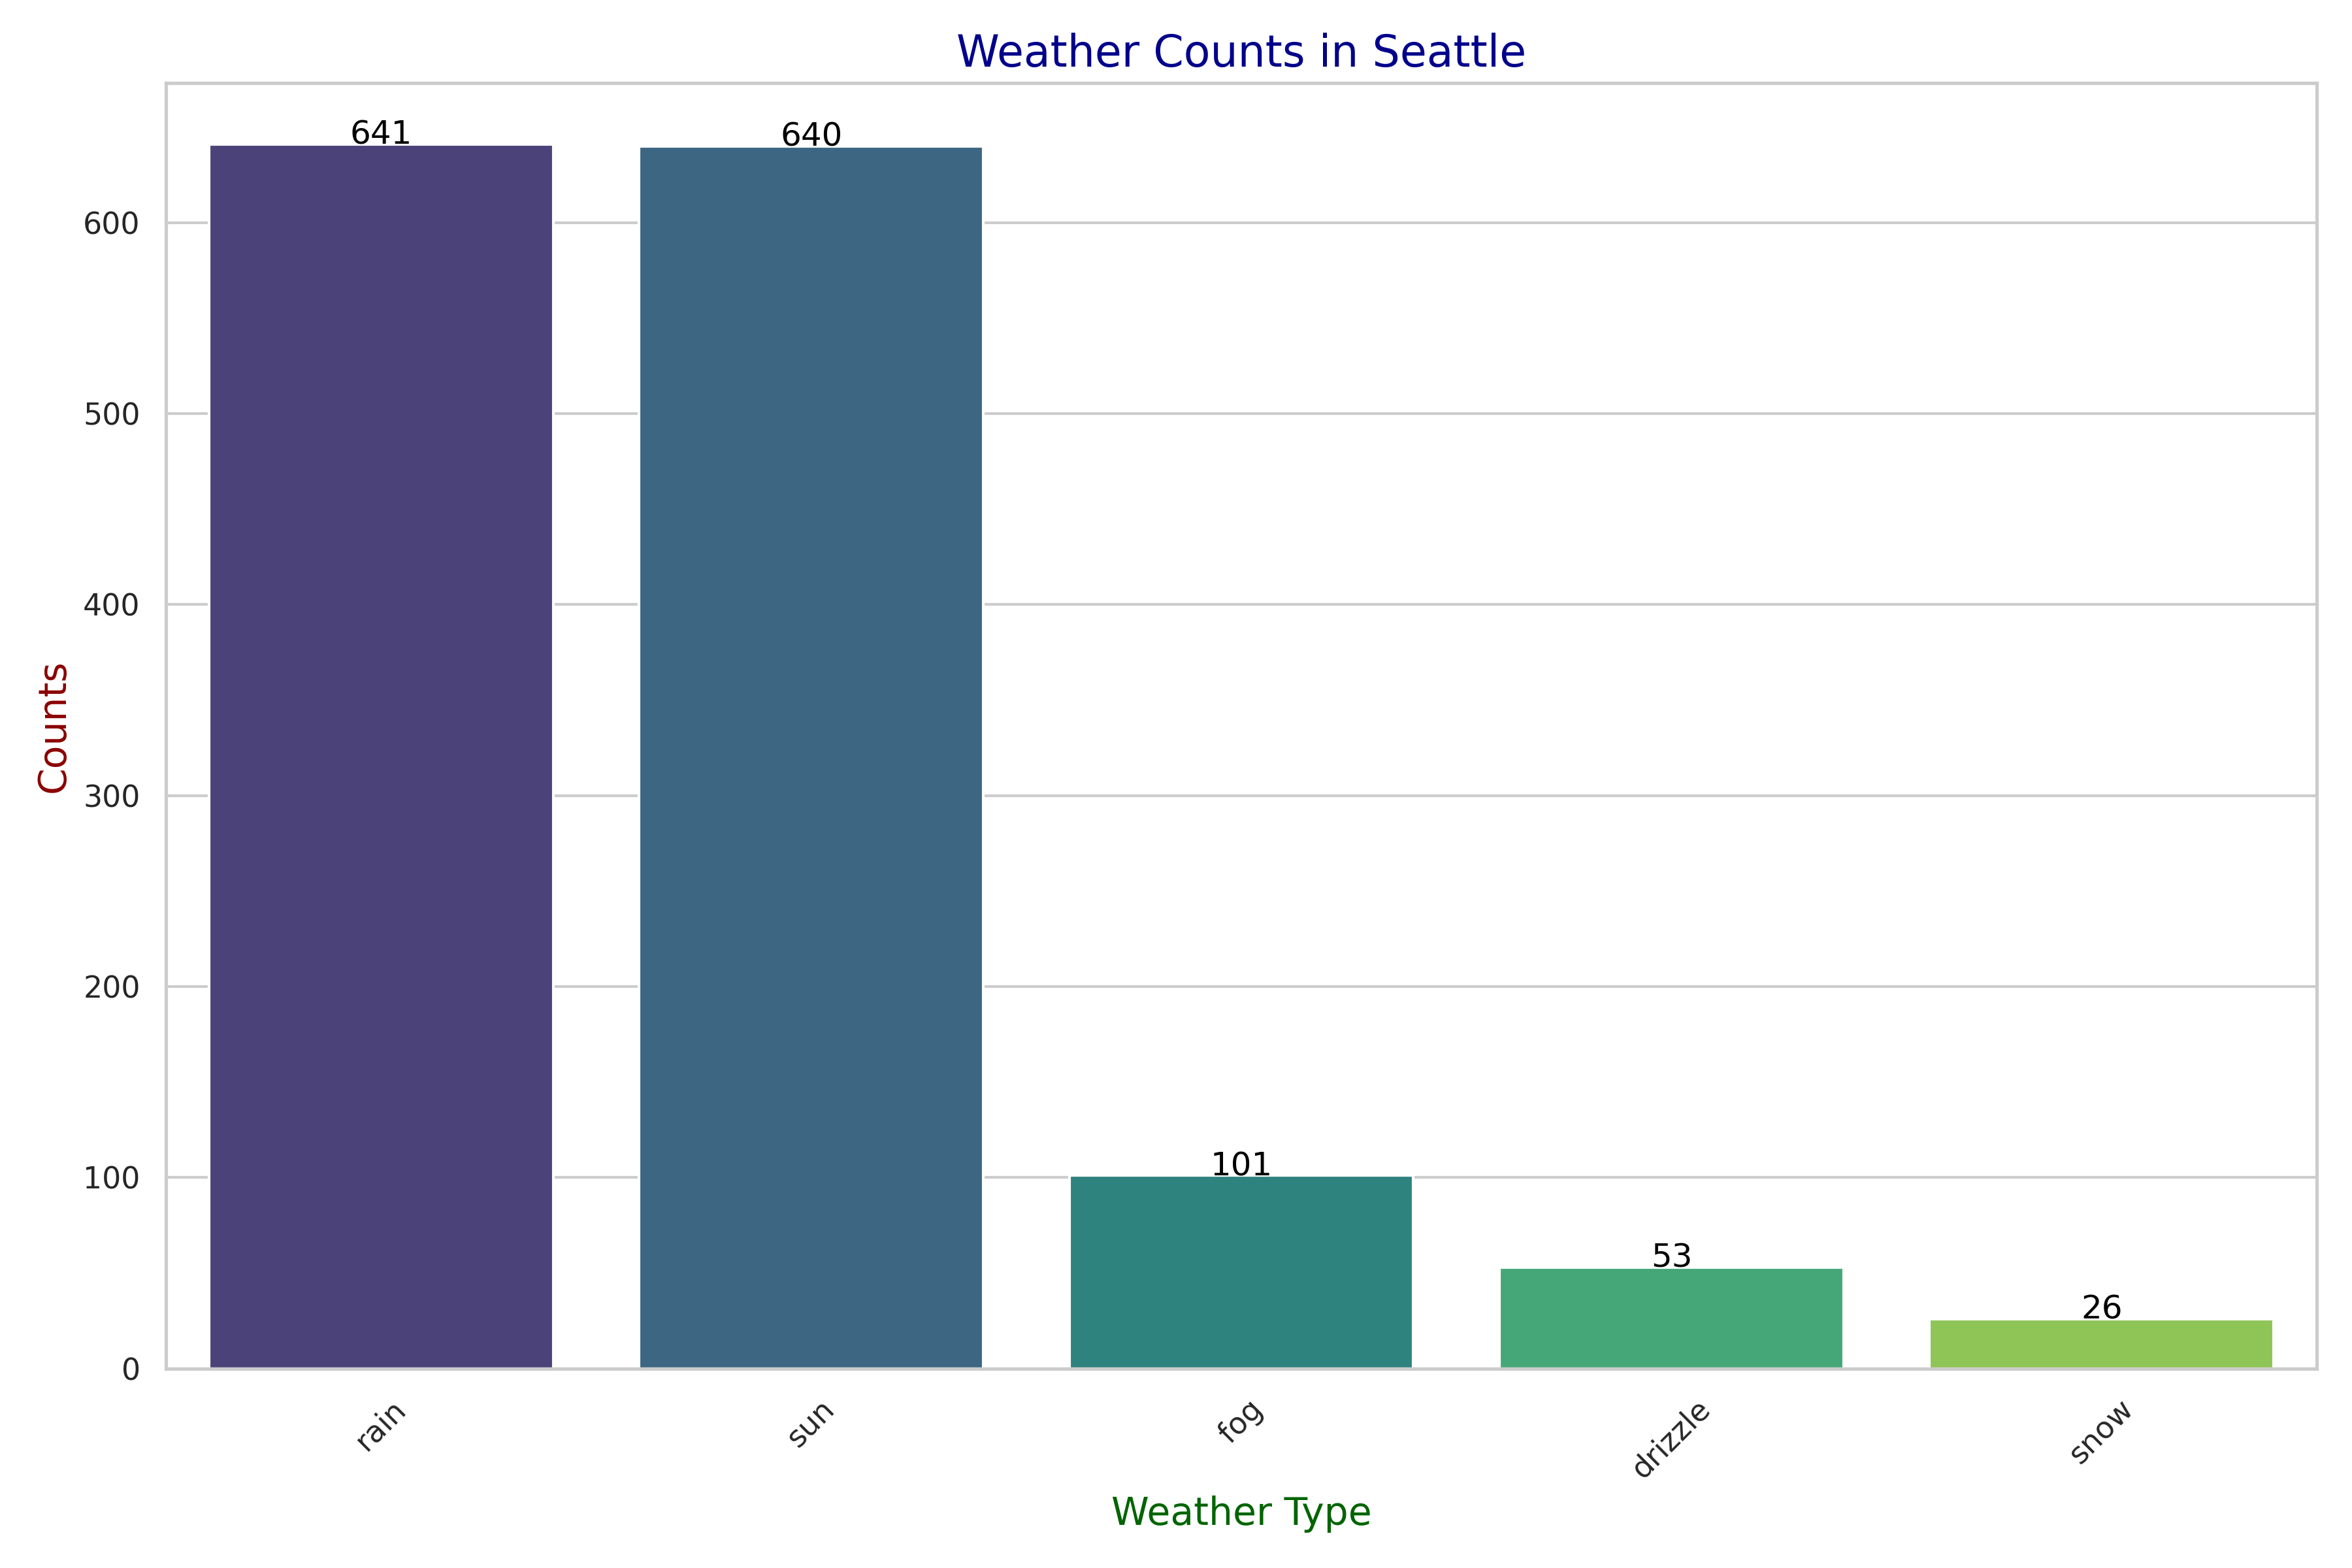

In [23]:
Image(filename="groupchat/seattle_weather_counts.png")